# *Лабораторная №1*

*Цель лабораторной работы: Познакомиться с основными возможностями библиотеки Pandas для анализа и обработки данных. Научиться выполнять загрузку данных, их очистку, трансформацию, анализ и визуализацию.*

### Задача 1: Загрузка и первичный анализ данных

Импортируйте необходимые библиотеки (Pandas, Matplotlib/Seaborn)

In [259]:
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sb

Выведите первые 10 записей из таблицы

In [260]:
train =  pd.read_csv('./data/train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Определите размерность данных, количество пустых значений в каждом столбце и типы данных.

In [261]:
train_shape = train.shape

print(f"Количество Строк gender_submission: {train_shape[0]}\n\n")

print(f"Количество Столбцов gender_submission: {train_shape[1]}\n\n")

print(f'Размерность таблицы: {train_shape[0] * train_shape[1]}\n\n')

print(f"Количество пустых значений в каждом столбце и типы данных:\n", train.isnull().sum(), sep='')

train.dtypes

Количество Строк gender_submission: 891


Количество Столбцов gender_submission: 12


Размерность таблицы: 10692


Количество пустых значений в каждом столбце и типы данных:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Задача 2: Очистка и подготовка данных

Удалите столбцы, которые не будут использоваться в анализе

In [262]:
# Удаляем колонки, в которых все значения уникальны  не повторяются

for column in train.columns:
    if len(train[column].unique()) == len(train):
        big_table = train.drop(columns=[column])

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Заполните пропущенные значения в столбце возраста (например, медианным значением возраста)

In [263]:
mid_age = big_table.Age.median()

train.Age = big_table.Age.fillna(mid_age)


train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Преобразуйте категориальные переменные в числовые (например, пол пассажиров)

In [264]:

def str_to_text_column(column: pd.core.series.Series):
    values = column.unique()
    index_value = range(0, len(values))
    correspondence = dict(zip(values, index_value))
    
    return correspondence

train.Sex = big_table.Sex.apply(lambda x: str_to_text_column(big_table.Sex)[x])
# big_table.Embarked = big_table.Embarked.apply(lambda x: str_to_text_column(big_table.Embarked)[x])
train.Embarked = train.Embarked.replace(['Q', 'S', 'C'], [0, 1, 2])


train

/var/folders/tw/9fjy61dd0_9gs_83f4578rgc0000gn/T/ipykernel_59701/2744945135.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Embarked = train.Embarked.replace(['Q', 'S', 'C'], [0, 1, 2])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0


## Графики

<Axes: >

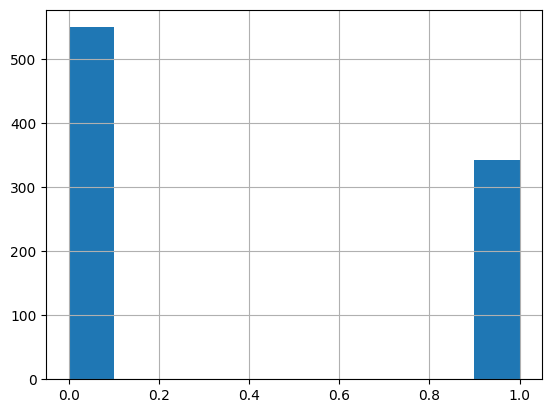

In [265]:
train.Survived.hist()

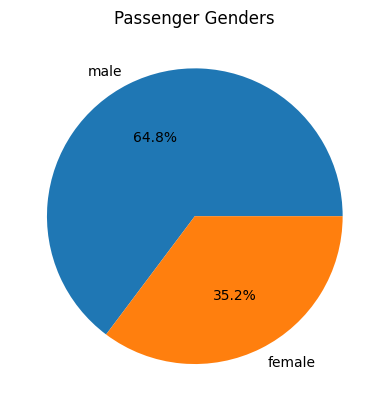

In [266]:
train_sex = list(train.Sex)

male = train_sex.count(0)
female = train_sex.count(1)

values = [male, female]
labels = ['male', 'female']



pt.pie(values, labels=labels, autopct='%1.1f%%')
pt.title('Passenger Genders')
pt.show()

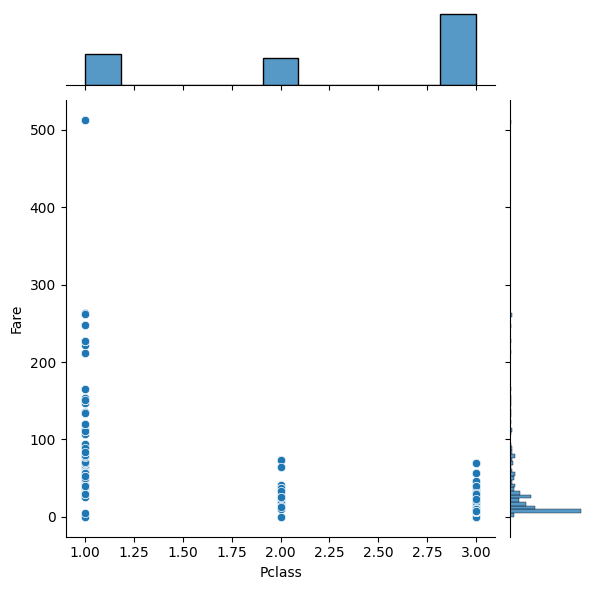

In [267]:
sb.jointplot(x='Pclass', y='Fare', data=train) 

In [268]:
train[(train.Sex == 0) & (train.Age < 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1.0
12,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,1.0
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",0,28.0,0,0,349217,7.8958,NaN,1.0
883,884,0,2,"Banfield, Mr. Frederick James",0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,1.0
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,1.0
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0
